# TASK #1: UNDERSTAND THE PROBLEM STATEMENT 

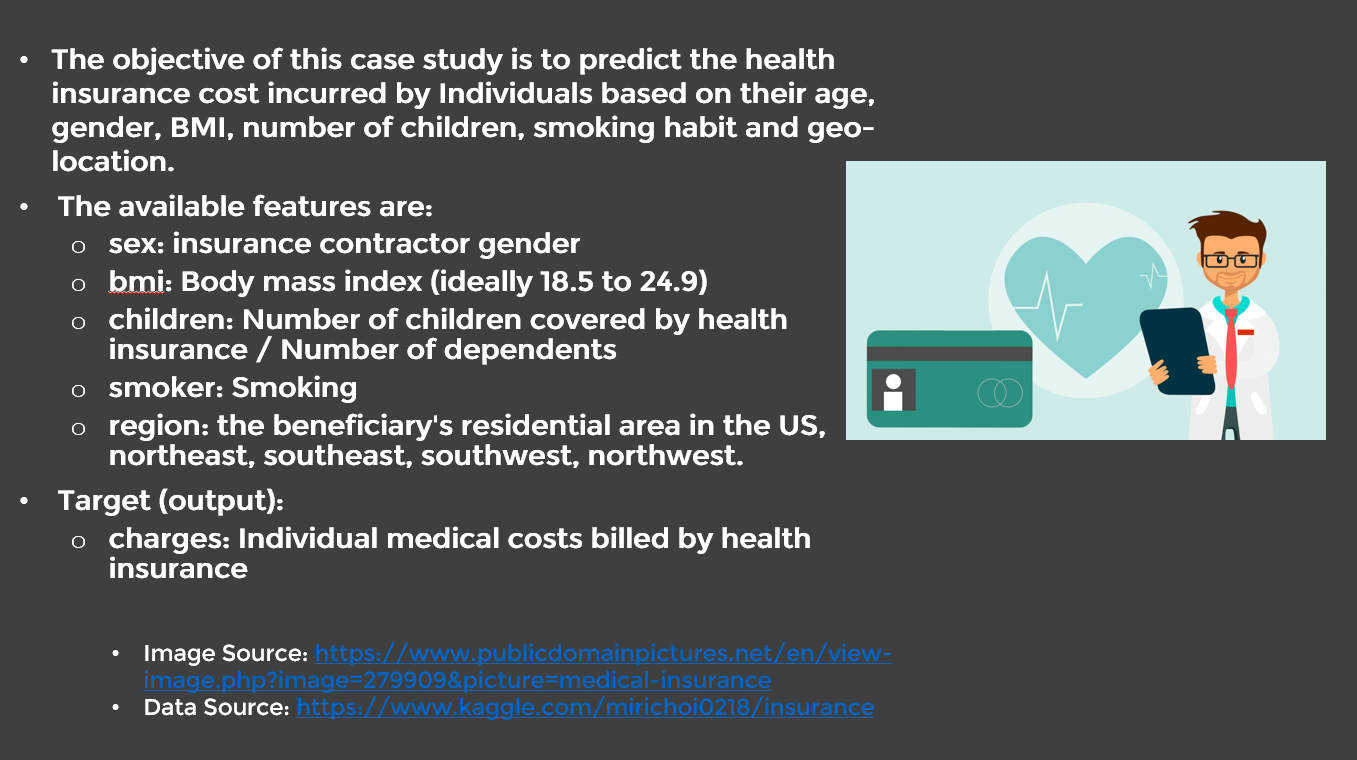

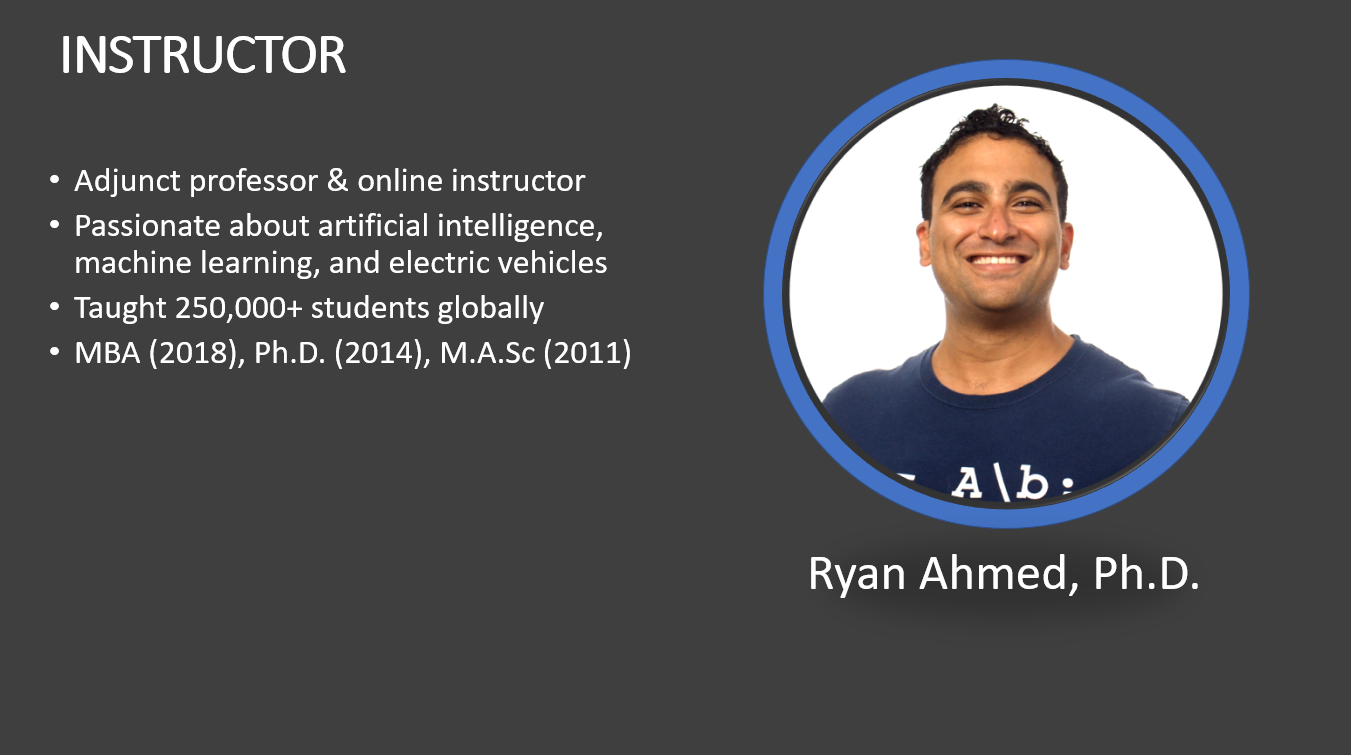

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [7]:
# read the csv file 
insurance_df = pd.read_csv('insurance.csv')

In [8]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS - PART 1

In [10]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

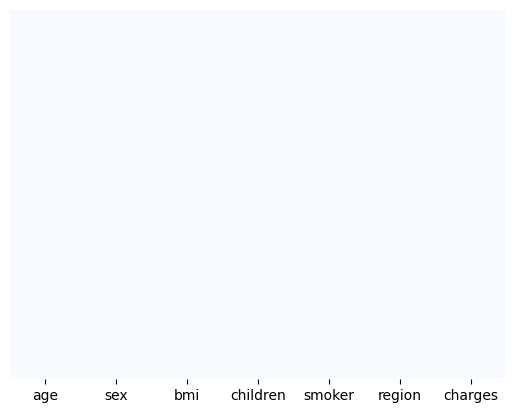

In [11]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");

In [12]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by = 'region')[['age', 'bmi', 'children', 'charges']].mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**


In [15]:
df_age = insurance_df.groupby(by = 'age')[['charges']].mean()
df_age

,charges
age,
18,7086.217556
19,9747.909335
20,10159.697736
21,4730.464330
22,10012.932802
23,12419.820040
24,10648.015962
25,9838.365311
26,6133.825309


# TASK #4: PERFORM FEATURE ENGINEERING

In [16]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [17]:
# convert categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x:0 if x == 'female' else 1)

In [18]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [19]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [20]:
# Convert categorical variable to numerical 
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [21]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [22]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True, dtype=int)

In [24]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [25]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [26]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [27]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)

In [28]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# TASK #5: PERFORM DATA VISUALIZATION

In [29]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

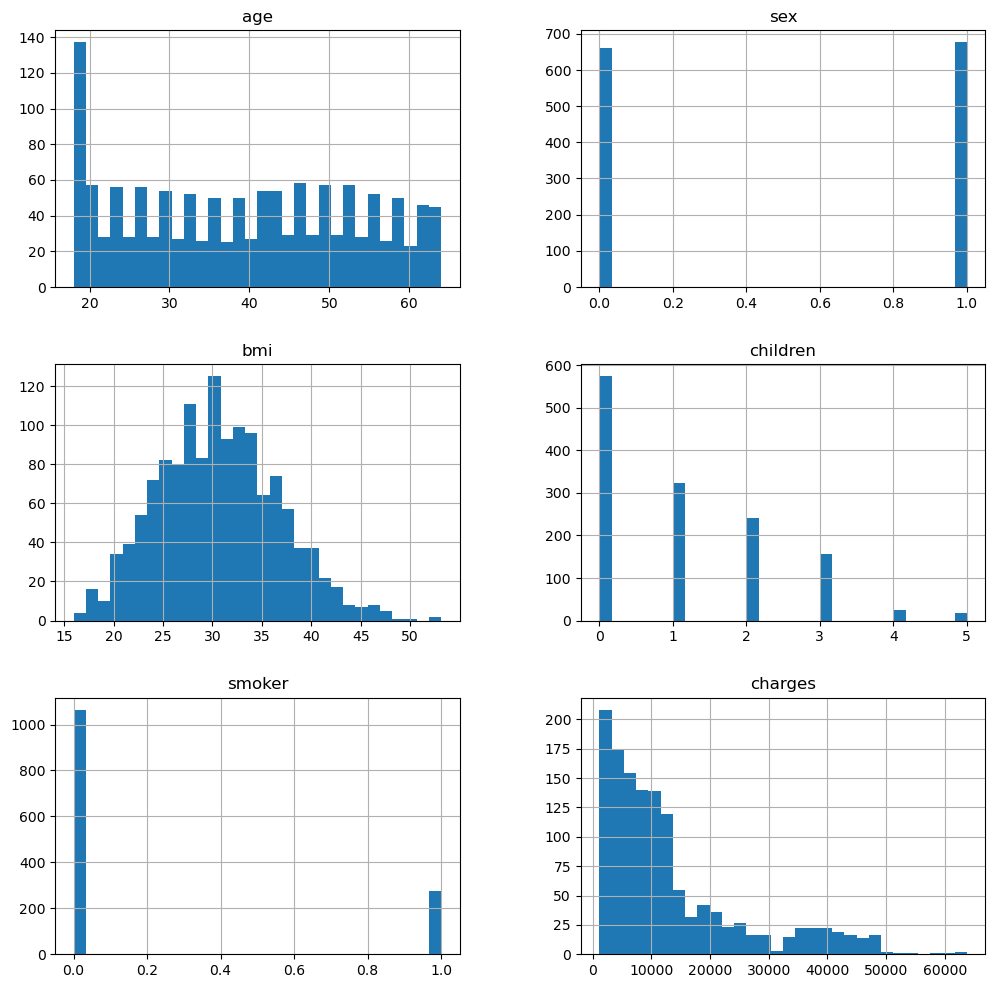

In [30]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins=30, figsize = (12,12));

C:\Users\Jay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


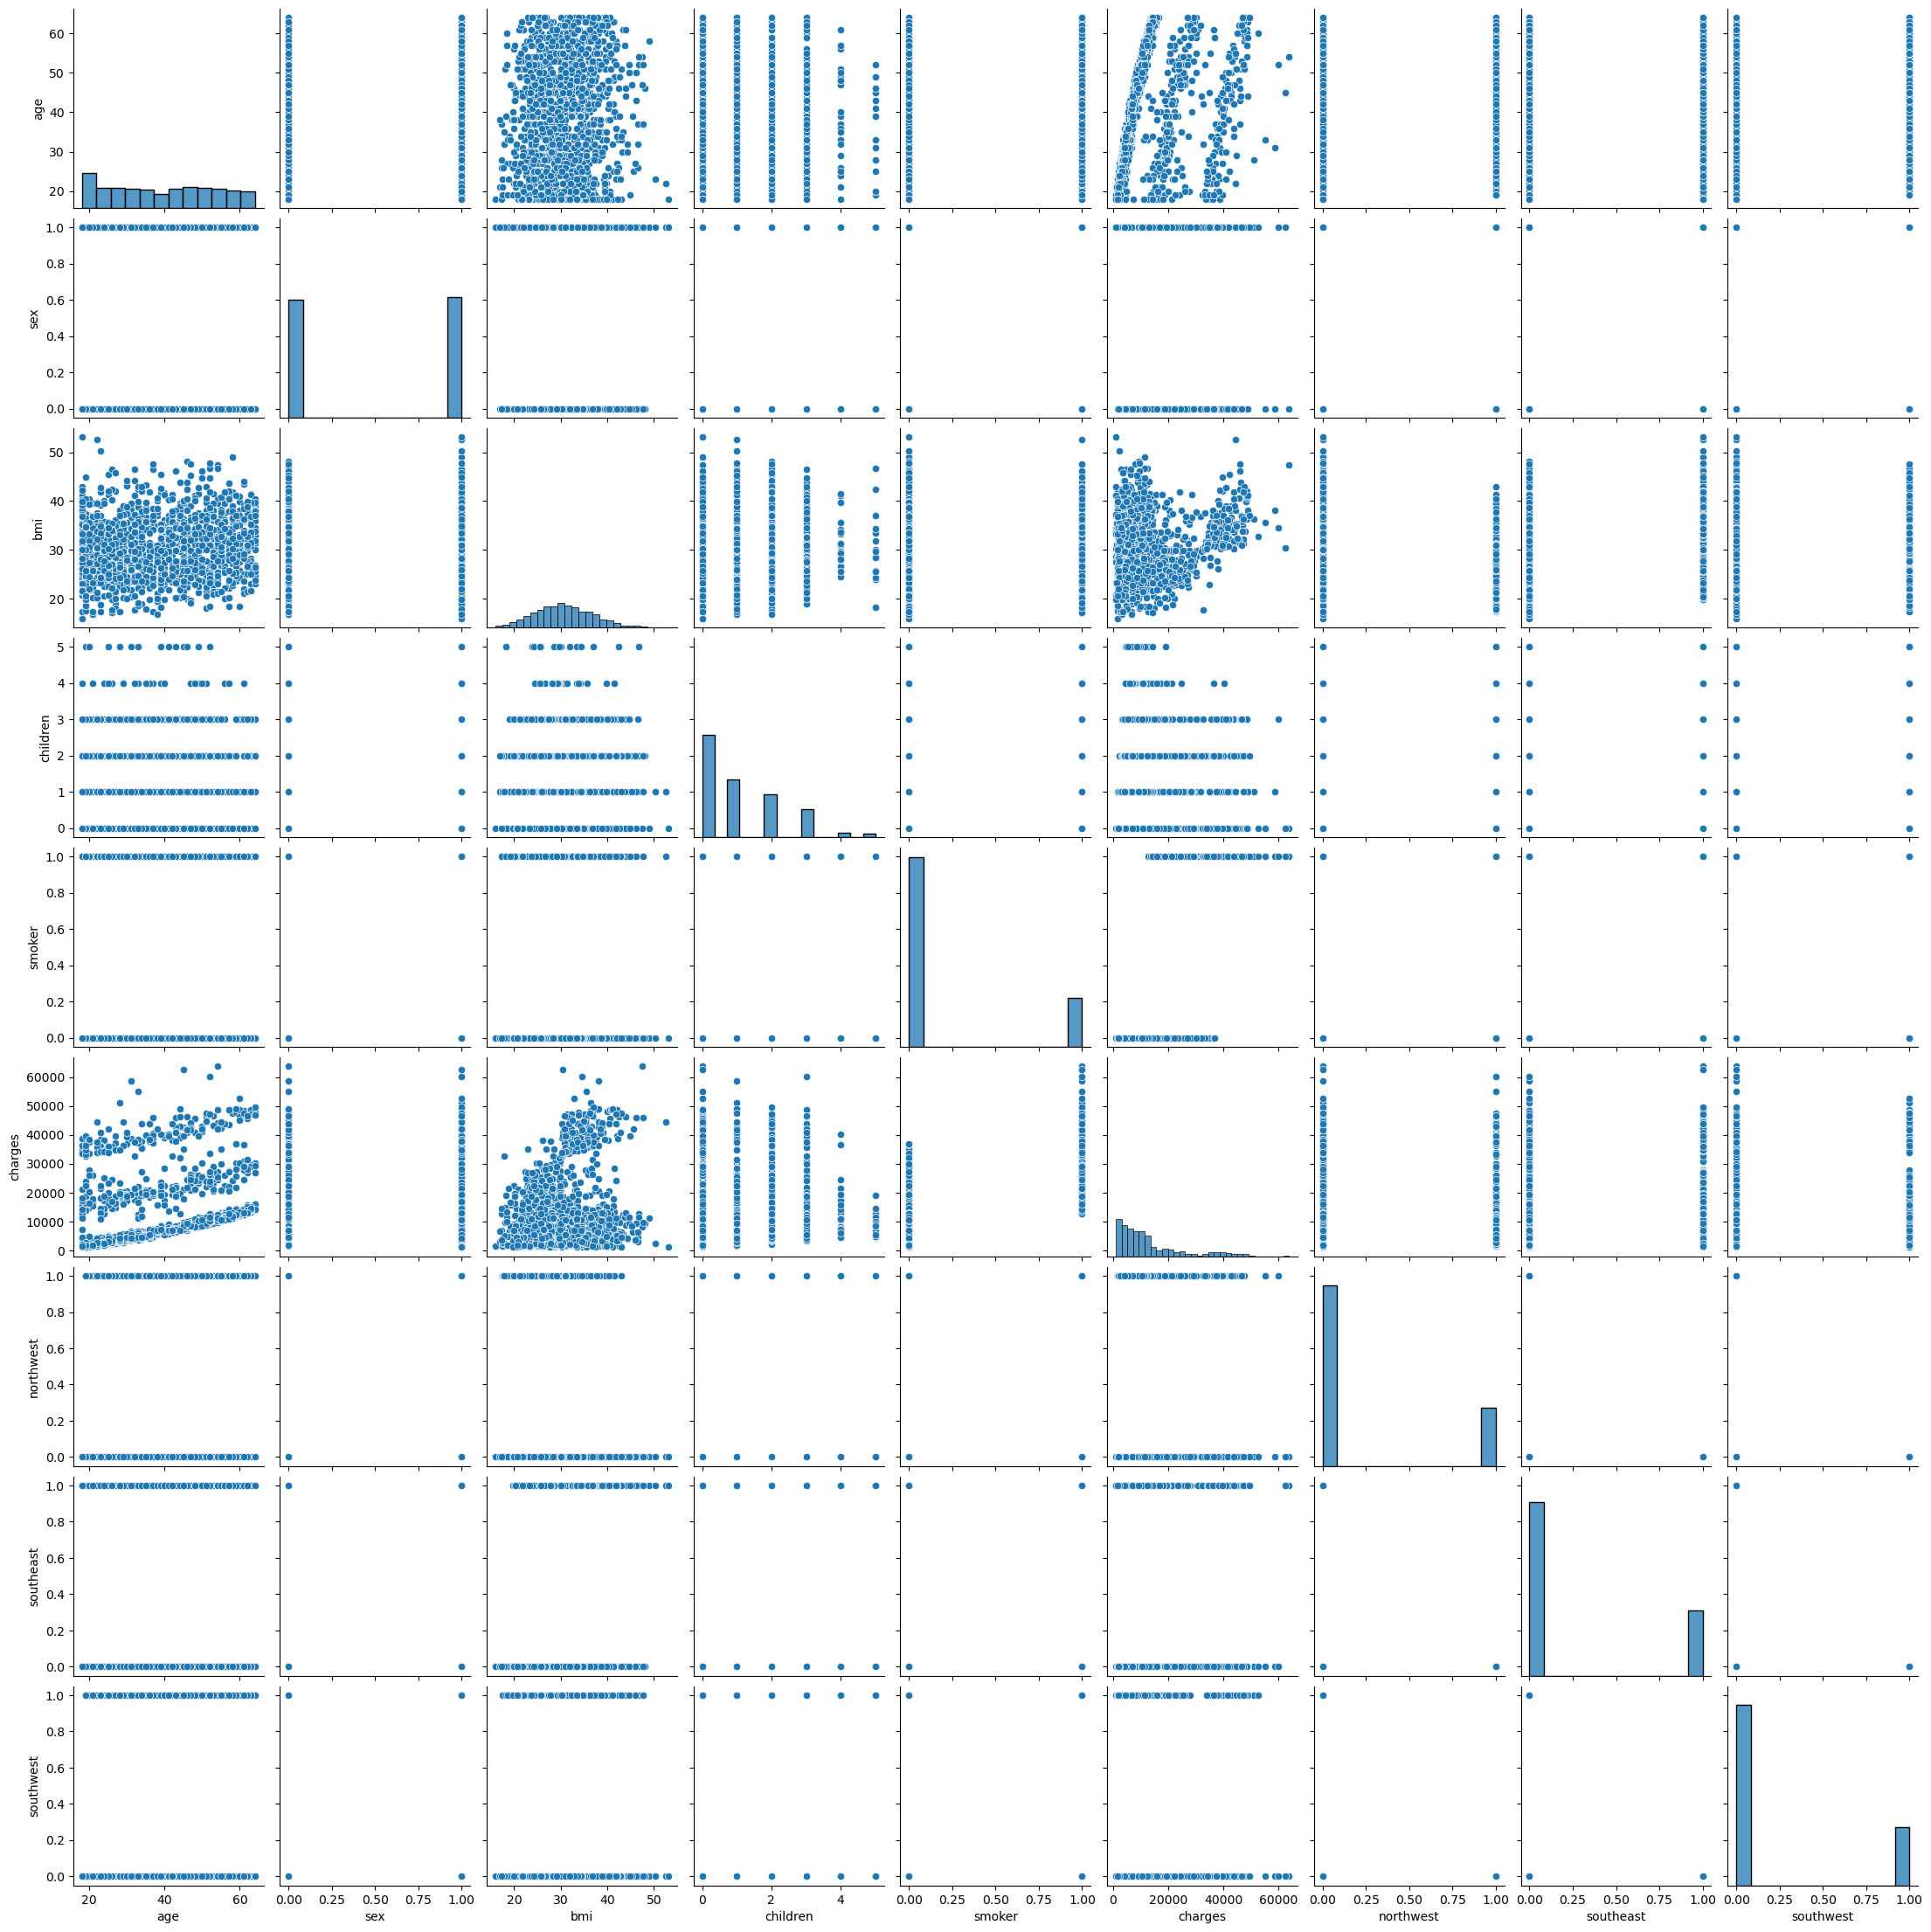

In [31]:
# plot pairplot
sns.pairplot(insurance_df);

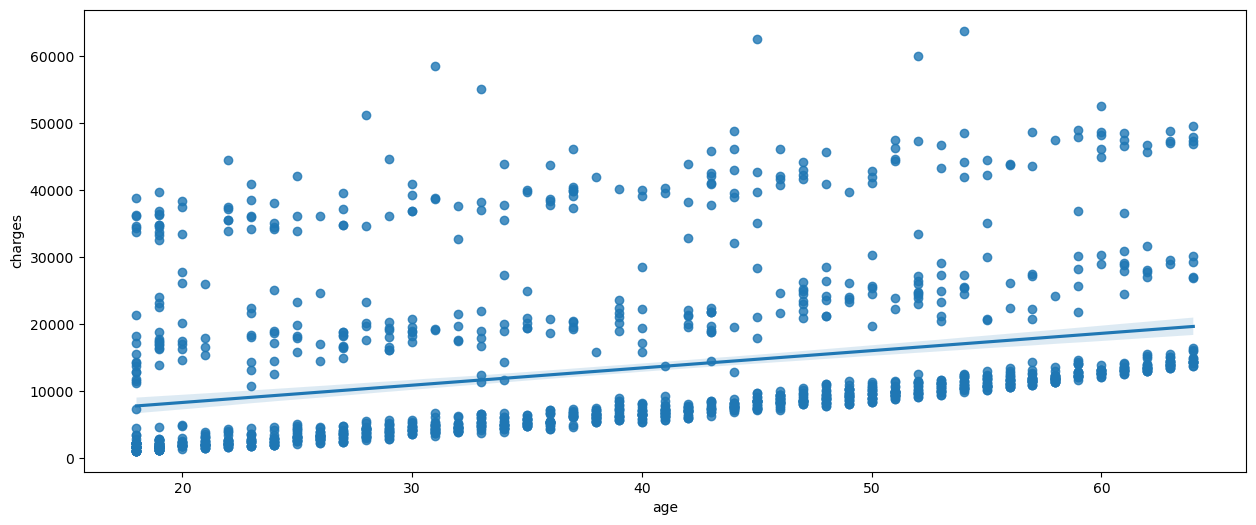

In [32]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show();

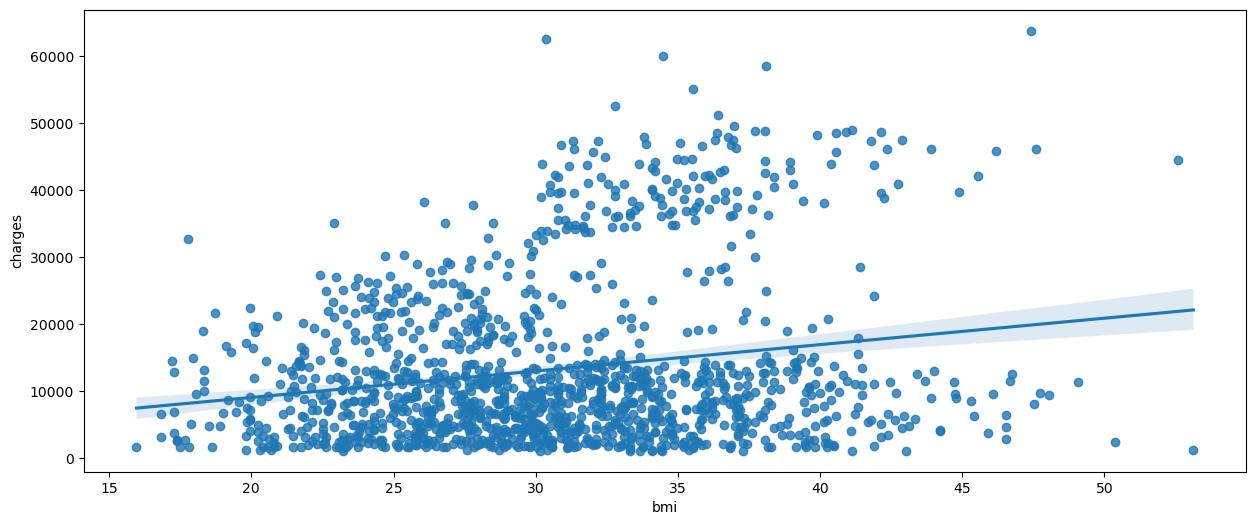

In [33]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show();

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [34]:
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


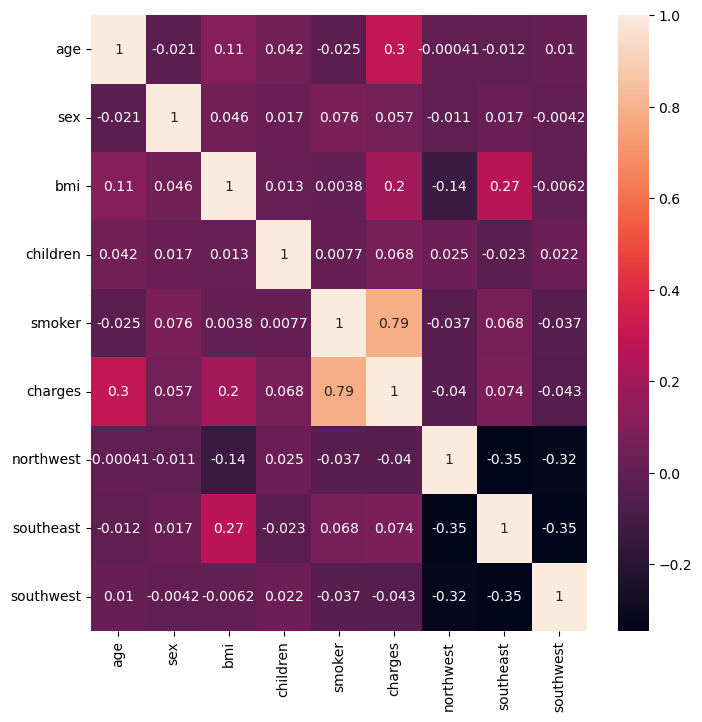

In [35]:
plt.figure(figsize = (8,8))
sns.heatmap(insurance_df.corr(), annot = True);

# TASK #6: CREATE TRAINING AND TESTING DATASET

In [36]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [37]:
X = insurance_df.drop(columns=['charges'])
X

In [39]:
y = insurance_df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [40]:
X.shape

(1338, 8)

In [41]:
y.shape

(1338,)

In [42]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [43]:
y = y.reshape(-1,1)

In [44]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [46]:
y

array([[ 0.29858378],
       [-0.95368916],
       [-0.72867465],
       ...,
       [-0.96159625],
       [-0.9303615 ],
       [ 1.3110534 ]], dtype=float32)

In [45]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:** 
- **Split the data into 20% Testing and 80% Training**
- **Double check that the split was successful by getting the shape of both the training and testing datasets**

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 8) (268, 8) (1070, 1) (268, 1)


# TASK #7: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [50]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
regresssion_model_sklearn_accuracy = model.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.6953286190228152

In [54]:
y_predict = model.predict(X_test)

In [55]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [56]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6536.847 
MSE = 42730372.0 
MAE = 4555.099 
R2 = 0.6953286321999361 
Adjusted R2 = 0.6859179335806291


# TASK #8: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [63]:
# !pip install tensorflow

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [62]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7

In [67]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 1s 9ms/step - loss: 0.4616 - val_loss: 0.2297
Epoch 2/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1790 - val_loss: 0.1707
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1488 - val_loss: 0.1857
Epoch 4/100
43/43 [==============================] - 0s 6ms/step - loss: 0.1401 - val_loss: 0.1634
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1372 - val_loss: 0.1794
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1324 - val_loss: 0.1989
Epoch 7/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1223 - val_loss: 0.1782
Epoch 8/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1186 - val_loss: 0.1747
Epoch 9/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1159 - val_loss: 0.1924
Epoch 10/100
43/43 [==============================] - 0s 7ms/step - loss: 0.1084 - val_loss: 0.1876
Epoch 11/

Epoch 83/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0369 - val_loss: 0.2505
Epoch 84/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0353 - val_loss: 0.2517
Epoch 85/100
43/43 [==============================] - 0s 7ms/step - loss: 0.0342 - val_loss: 0.2666
Epoch 86/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0392 - val_loss: 0.2522
Epoch 87/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0379 - val_loss: 0.2398
Epoch 88/100
43/43 [==============================] - 0s 8ms/step - loss: 0.0339 - val_loss: 0.2685
Epoch 89/100
43/43 [==============================] - 0s 8ms/step - loss: 0.0346 - val_loss: 0.2225
Epoch 90/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0315 - val_loss: 0.2681
Epoch 91/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0348 - val_loss: 0.2207
Epoch 92/100
43/43 [==============================] - 0s 5ms/step - loss: 0.0354 - val_loss: 0.2509


In [68]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 3ms/step - loss: 0.2546
Accuracy : 0.7454076707363129


In [69]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

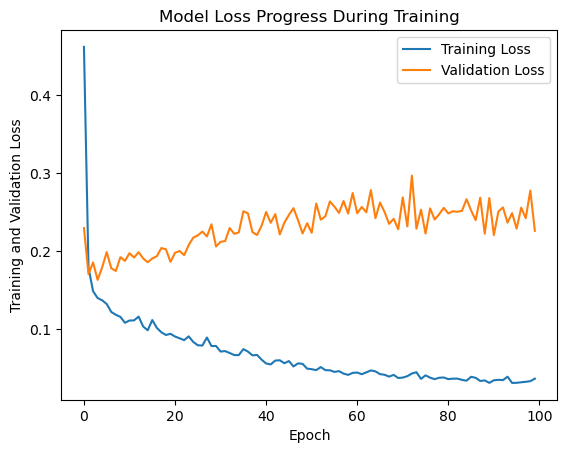

In [70]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 [==============================] - 0s 2ms/step


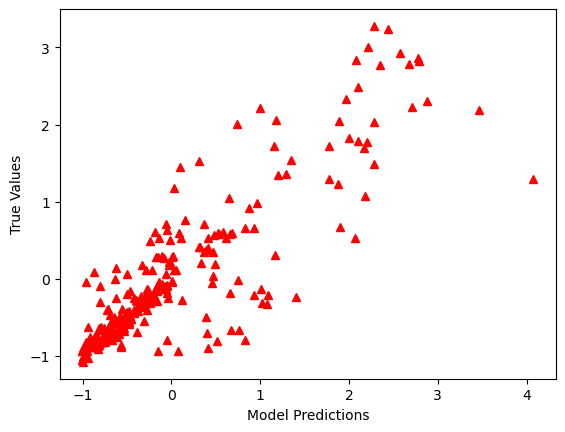

In [72]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [73]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

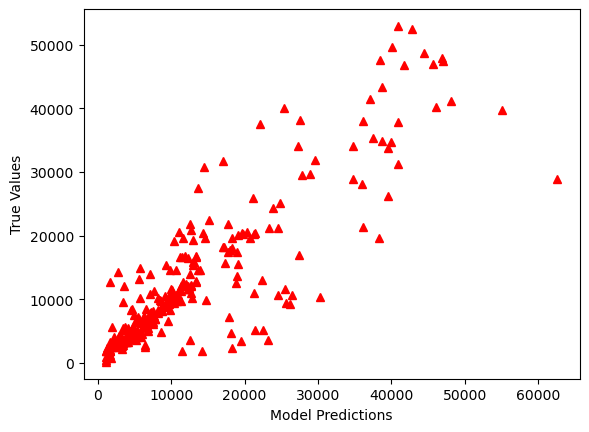

In [75]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [76]:
k = X_test.shape[1]
n = len(X_test)
print(n)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

268
RMSE = 6108.082 
MSE = 37308660.0 
MAE = 3572.688 
R2 = 0.7339859175392403 
Adjusted R2 = 0.7257692663435411


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:** 
- **Dropout is a regularization technique that is used to improve the network generalization ability. Experiment adding dropout layers to enahnce network generalization ability**
- **Retrain the network and assess its performance**

In [77]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                450       
                                                                 
 activation_4 (Activation)   (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 activation_5 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 activation_6 (Activation)   (None, 150)              

In [78]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 1s 9ms/step - loss: 0.7958 - val_loss: 0.3813
Epoch 2/100
43/43 [==============================] - 0s 6ms/step - loss: 0.4368 - val_loss: 0.2727
Epoch 3/100
43/43 [==============================] - 0s 6ms/step - loss: 0.3186 - val_loss: 0.2445
Epoch 4/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2570 - val_loss: 0.2275
Epoch 5/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2514 - val_loss: 0.1863
Epoch 6/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2374 - val_loss: 0.1910
Epoch 7/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2188 - val_loss: 0.1991
Epoch 8/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2294 - val_loss: 0.2164
Epoch 9/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2087 - val_loss: 0.1815
Epoch 10/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2139 - val_loss: 0.1849
Epoch 11/

43/43 [==============================] - 0s 6ms/step - loss: 0.1264 - val_loss: 0.1947
Epoch 84/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1358 - val_loss: 0.1878
Epoch 85/100
43/43 [==============================] - 0s 6ms/step - loss: 0.1255 - val_loss: 0.2046
Epoch 86/100
43/43 [==============================] - 0s 6ms/step - loss: 0.1298 - val_loss: 0.1888
Epoch 87/100
43/43 [==============================] - 0s 7ms/step - loss: 0.1322 - val_loss: 0.2082
Epoch 88/100
43/43 [==============================] - 0s 6ms/step - loss: 0.1309 - val_loss: 0.2099
Epoch 89/100
43/43 [==============================] - 0s 6ms/step - loss: 0.1286 - val_loss: 0.2259
Epoch 90/100
43/43 [==============================] - 0s 7ms/step - loss: 0.1273 - val_loss: 0.1857
Epoch 91/100
43/43 [==============================] - 0s 7ms/step - loss: 0.1250 - val_loss: 0.2013
Epoch 92/100
43/43 [==============================] - 0s 7ms/step - loss: 0.1231 - val_loss: 0.1907
Epoch 93/100


In [85]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 2ms/step - loss: 0.2089
Accuracy : 0.7911355942487717


In [79]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

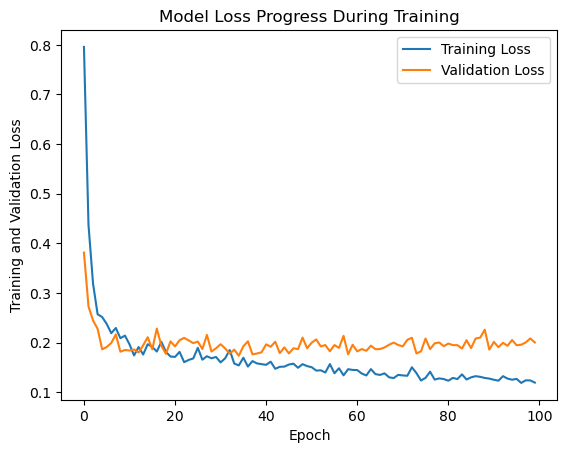

In [84]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

9/9 [==============================] - 0s 2ms/step


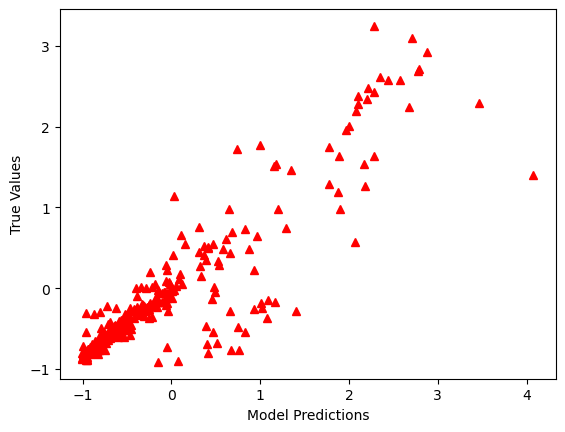

In [81]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

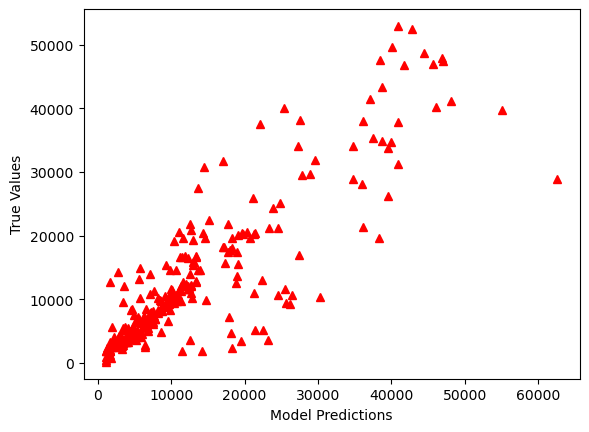

In [82]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [83]:
k = X_test.shape[1]
n = len(X_test)
print(n)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

268
RMSE = 6108.082 
MSE = 37308660.0 
MAE = 3572.688 
R2 = 0.7339859175392403 
Adjusted R2 = 0.7257692663435411


# GREAT JOB!

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**


In [ ]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

**PRACTICE OPPORTUNITY #2 SOLUTION:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(insurance_df.corr(), annot = True)
# smoker and age have positive correlations with charges

**PRACTICE OPPORTUNITY #3 SOLUTION:** 
- **Split the data into 20% Testing and 80% Training**
- **Double check that the split was successful by getting the shape of both the training and testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)

**PRACTICE OPPORTUNITY #4 SOLUTION:** 
- **Dropout is a regularization technique that is used to improve the network generalization ability. Experiment adding dropout layers to enahnce network generalization ability**
- **Retrain the network and assess its performance**

In [ ]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()